In [348]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [73]:
import tensorflow as tf
import numpy as np
from utils import load_data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os

In [74]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [88]:
tf.reset_default_graph()

In [69]:
np.set_printoptions(linewidth=200)

In [77]:
with tf.device('/cpu:0'):
    x = tf.constant(1., name='x')

    y = tf.constant(2., name='y')
    z = tf.constant(3., name='z')

    c = tf.multiply(tf.add(x, y, name='x_p_y'), z, name='c')
    
    a = tf.get_variable('scalar', initializer=tf.constant(2))

writer = tf.summary.FileWriter('./data/graph', tf.get_default_graph())
with tf.Session()as sess:
    print(sess.run(c))
writer.close()

9.0


In [8]:
data = np.loadtxt('data/weatherHistory.csv', skiprows=1 ,delimiter=',')
# data_X, data_y = load_data ("data/weatherHistory.csv")

In [43]:
tr_X, te_X, tr_y, te_y = train_test_split(data[:,:-1], data[:,[-1]], test_size=.2)
# data_y = data[:,[-1]]

In [96]:
scaler = StandardScaler()
tr_X = scaler.fit_transform(tr_X)
te_X = scaler.transform(te_X)

In [13]:
num_features = tr_X.shape[1]
w_shape = (num_features, 1)

In [89]:
X = tf.placeholder(shape=(None, num_features), dtype=tf.float32, name='input')
y = tf.placeholder(shape=(None, 1), dtype=tf.float32, name='target')

In [90]:
# theta = tf.get_variable(shape=w_shape, dtype=tf.float32, name='weights', initializer=None)
# b = tf.get_variable(shape=(1,1), dtype=tf.float32, name='bias', initializer=None)
theta = tf.get_variable(shape=w_shape, dtype=tf.float32, name='weights', initializer=tf.zeros_initializer())
b = tf.get_variable(shape=(1,1), dtype=tf.float32, name='bias', initializer=tf.zeros_initializer())

In [91]:
h = tf.matmul(X, theta) + b

loss = tf.reduce_mean((y-h)**2, name='loss')

In [92]:
optimiser = tf.train.GradientDescentOptimizer(learning_rate=.1)
# optimiser = tf.train.AdamOptimizer(learning_rate=.1)

opt = optimiser.minimize(loss)

In [93]:
initialiser = tf.global_variables_initializer()
inits = tf.local_variables_initializer()

In [102]:
epochs = 500
with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
#     sess.run(initialiser)
#     sess.run(inits)
#     print(sess.run(tf.report_uninitialized_variables()))
#     print(tf.trainable_variables())
    sess.run(tf.global_variables_initializer())
    t = sess.run(theta)
    print(sess.run(b))
    print(sess.run(theta))
    t1 = sess.run(b)
    print(sess.run(loss, {X: tr_X, y: tr_y}))
    test_loss = []
    train_loss = []
    for i in range(epochs):
        _, tr_loss = sess.run([opt, loss], {X: tr_X, y: tr_y})
        te_loss = sess.run(loss, {X: te_X, y: te_y})
        train_loss += [tr_loss]
        test_loss += [te_loss]
#         print(sess.run(loss, {X: te_X, y: te_y}))
#         print(sess.run(h-y, {X: data_X, y: data_y}).shape)
#         sess.run(optimiser.apply_gradients(optimiser.compute_gradients(loss, {X: data_X, y: data_y})))
#     print(sess.run(tf.report_uninitialized_variables()))
    result = sess.run(loss, {X: tr_X, y: tr_y})
    th0 = sess.run(b)
    tht = sess.run(theta)

[[0.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
233.63515


In [98]:
print(tht, th0)

[[-5.762909  ]
 [-1.3991988 ]
 [ 0.28769276]
 [ 1.9971329 ]
 [-0.43276006]] [[8.135934]]


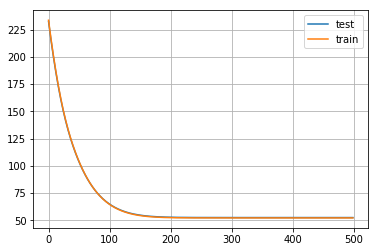

train loss = 52.143467
test loss = 52.470387


In [104]:
num_points = 500
plt.plot(test_loss[:num_points], label='test')
plt.plot(train_loss[:num_points], label='train')
plt.grid()
plt.legend()
plt.show()
print('train loss =', train_loss[-1])
print('test loss =', test_loss[-1])

In [126]:
data = np.loadtxt('data/candy.csv', skiprows=1 ,delimiter=',')
# data_X, data_y = load_data ("data/weatherHistory.csv")

In [127]:
tr_X, te_X, tr_y, te_y = train_test_split(data[:,:-1], data[:,[-1]], test_size=.2)
# data_y = data[:,[-1]]

In [187]:
tr_y = tr_y.astype(np.float32)
tr_X = tr_X.astype(np.float32)
te_y = te_y.astype(np.float32)
te_X = te_X.astype(np.float32)

In [159]:
scaler = StandardScaler()
tr_X = scaler.fit_transform(tr_X)
te_X = scaler.transform(te_X)

In [160]:
num_features = tr_X.shape[1]
w_shape = (num_features, 1)

In [173]:
tf.reset_default_graph()

In [174]:
X = tf.placeholder(np.float32, (None, num_features), 'input')
y = tf.placeholder(np.float32, (None, 1), 'label')

In [175]:
weights = tf.get_variable('weights_log', (num_features, 1), tf.float32, initializer=tf.zeros_initializer())

In [176]:
intercept = tf.get_variable('intercept', (1), tf.float32, initializer=tf.zeros_initializer())

In [177]:
logits = tf.matmul(X, weights) + intercept

In [178]:
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=logits), name='loss')

In [179]:
hyp = tf.sigmoid(logits)

In [191]:
optimiser = tf.train.AdamOptimizer(learning_rate=.01).minimize(loss)

In [192]:
epochs = 300
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(loss, feed_dict={X: te_X, y: te_y}))
    test_loss = []
    train_loss = []
    for i in range(epochs):
        _, tr_loss = sess.run([optimiser, loss], feed_dict={X: tr_X, y: tr_y})
        te_loss = sess.run(loss, {X: te_X, y: te_y})
        train_loss += [tr_loss]
        test_loss += [te_loss]
    print(sess.run(loss, feed_dict={X: te_X, y: te_y}))

0.6931472
0.21625167


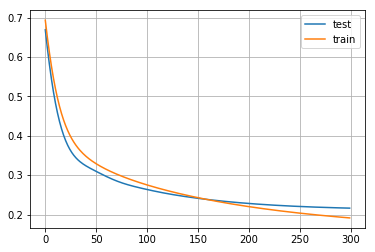

train loss = 0.19143188
test loss = 0.21625167


In [193]:
num_points = 300
plt.plot(test_loss[:num_points], label='test')
plt.plot(train_loss[:num_points], label='train')
plt.grid()
plt.legend()
plt.show()
print('train loss =', train_loss[-1])
print('test loss =', test_loss[-1])